# <center>**Introduction to Data Science**</center>
# <center>**FLIGHT DELAY PREDICTION**</center>

# 1. Business Understanding

Students are expected to identify an analytical problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.

   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?
   4. What kind of analytics task are you performing?


# 2. Data Acquisition

For the problem identified , find an appropriate data set (Your data set must
be unique with minimum **20 features and 10k rows**) from any public data source.

---



## 2.1 Download the data directly



In [1]:
# ##---------Type the code below this line------------------##
import kaggle

dataset_path = 'patrickzel/flight-delay-and-cancellation-dataset-2019-2023'  
filename = 'flights_sample_3m.csv'  

kaggle.api.dataset_download_file(dataset_path, file_name = filename, path = '.')


Dataset URL: https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023


False

## 2.2 Code for converting the above downloaded data into a dataframe

In [1]:
##---------Type the code below this line------------------##
import pandas as pd
import zipfile as zp

zipfilename = 'flights_sample_3m.csv.zip'

with zp.ZipFile(zipfilename, 'r') as zip_ref:
    zip_ref.extractall('.')

df = pd.read_csv(zipfilename)

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [3]:
##---------Type the code below this line------------------##

pd.set_option('display.max_columns', None)

print("\nFirst 5 records :")
display(df.head())
print("\nLast 5 records :")
display(df.tail())


First 5 records :


FL_DATE                AIRLINE                AIRLINE_DOT AIRLINE_CODE  \
0  2019-01-09  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
1  2022-11-19   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
2  2022-07-22  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
3  2023-03-06   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
4  2020-02-23       Spirit Air Lines       Spirit Air Lines: NK           NK   

   DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST  \
0     19977       1562    FLL  Fort Lauderdale, FL  EWR   
1     19790       1149    MSP      Minneapolis, MN  SEA   
2     19977        459    DEN           Denver, CO  MSP   
3     19790       2295    MSP      Minneapolis, MN  SFO   
4     20416        407    MCO          Orlando, FL  DFW   

               DEST_CITY  CRS_DEP_TIME  DEP_TIME  DEP_DELAY  TAXI_OUT  \
0             Newark, NJ          1155    1151.0       -4.0      19.0   
1            Seattle, WA          2120    2114.0       -6.0       9.0   
2        Minneapolis, MN           954    1000.0        6.0      20.0   
3      San Francisco, CA          1609    1608.0       -1.0      27.0   
4  Dallas/Fort Worth, TX          1840    1838.0       -2.0      15.0   

   WHEELS_OFF  WHEELS_ON  TAXI_IN  CRS_ARR_TIME  ARR_TIME  ARR_DELAY  \
0      1210.0     1443.0      4.0          1501    1447.0      -14.0   
1      2123.0     2232.0     38.0          2315    2310.0       -5.0   
2      1020.0     1247.0      5.0          1252    1252.0        0.0   
3      1635.0     1844.0      9.0          1829    1853.0       24.0   
4      1853.0     2026.0     14.0          2041    2040.0       -1.0   

   CANCELLED CANCELLATION_CODE  DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  \
0        0.0               NaN       0.0             186.0         176.0   
1        0.0               NaN       0.0             235.0         236.0   
2        0.0               NaN       0.0             118.0         112.0   
3        0.0               NaN       0.0             260.0         285.0   
4        0.0               NaN       0.0             181.0         182.0   

   AIR_TIME  DISTANCE  DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
0     153.0    1065.0                NaN                NaN            NaN   
1     189.0    1399.0                NaN                NaN            NaN   
2      87.0     680.0                NaN                NaN            NaN   
3     249.0    1589.0                0.0                0.0           24.0   
4     153.0     985.0                NaN                NaN            NaN   

   DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  
0                 NaN                      NaN  
1                 NaN                      NaN  
2                 NaN                      NaN  
3                 0.0                      0.0  
4                 NaN                      NaN


Last 5 records :


FL_DATE                 AIRLINE                 AIRLINE_DOT  \
2999995  2022-11-13  American Airlines Inc.  American Airlines Inc.: AA   
2999996  2022-11-02  American Airlines Inc.  American Airlines Inc.: AA   
2999997  2022-09-11    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   
2999998  2019-11-13        Republic Airline        Republic Airline: YX   
2999999  2019-06-15  Southwest Airlines Co.  Southwest Airlines Co.: WN   

        AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN       ORIGIN_CITY DEST  \
2999995           AA     19805       1522    JAX  Jacksonville, FL  CLT   
2999996           AA     19805       1535    ORD       Chicago, IL  AUS   
2999997           DL     19790       2745    HSV    Huntsville, AL  ATL   
2999998           YX     20452       6134    BOS        Boston, MA  LGA   
2999999           WN     19393       2823    LGB    Long Beach, CA  SJC   

             DEST_CITY  CRS_DEP_TIME  DEP_TIME  DEP_DELAY  TAXI_OUT  \
2999995  Charlotte, NC          1742    1740.0       -2.0      10.0   
2999996     Austin, TX          1300    1254.0       -6.0      10.0   
2999997    Atlanta, GA           534     615.0       41.0      16.0   
2999998   New York, NY          1600    1555.0       -5.0      19.0   
2999999   San Jose, CA           730     727.0       -3.0       9.0   

         WHEELS_OFF  WHEELS_ON  TAXI_IN  CRS_ARR_TIME  ARR_TIME  ARR_DELAY  \
2999995      1750.0     1845.0      6.0          1907    1851.0      -16.0   
2999996      1304.0     1514.0      5.0          1556    1519.0      -37.0   
2999997       631.0      759.0      6.0           729     805.0       36.0   
2999998      1614.0     1704.0      8.0          1728    1712.0      -16.0   
2999999       736.0      828.0      2.0           840     830.0      -10.0   

         CANCELLED CANCELLATION_CODE  DIVERTED  CRS_ELAPSED_TIME  \
2999995        0.0               NaN       0.0              85.0   
2999996        0.0               NaN       0.0             176.0   
2999997        0.0               NaN       0.0              55.0   
2999998        0.0               NaN       0.0              88.0   
2999999        0.0               NaN       0.0              70.0   

         ELAPSED_TIME  AIR_TIME  DISTANCE  DELAY_DUE_CARRIER  \
2999995          71.0      55.0     328.0                NaN   
2999996         145.0     130.0     977.0                NaN   
2999997          50.0      28.0     151.0                0.0   
2999998          77.0      50.0     184.0                NaN   
2999999          63.0      52.0     324.0                NaN   

         DELAY_DUE_WEATHER  DELAY_DUE_NAS  DELAY_DUE_SECURITY  \
2999995                NaN            NaN                 NaN   
2999996                NaN            NaN                 NaN   
2999997               36.0            0.0                 0.0   
2999998                NaN            NaN                 NaN   
2999999                NaN            NaN                 NaN   

         DELAY_DUE_LATE_AIRCRAFT  
2999995                      NaN  
2999996                      NaN  
2999997                      0.0  
2999998                      NaN  
2999999                      NaN

## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [4]:
##---------Type the code below this line------------------##
print("\nCOLUMN HEADINGS:\n")
print(df.columns)
print("\nINFORMATION AND DESCRIPTION:\n")
print(df.info())
print("\nSTATISTICAL SUMMARY:")
display(df.describe(include='all')
        .apply(lambda s: s.apply(lambda x: '{0:.5f}'.format(x) 
                                 if isinstance(x, (int, float)) else x)))


COLUMN HEADINGS:

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

INFORMATION AND DESCRIPTION:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER        

FL_DATE                 AIRLINE                 AIRLINE_DOT  \
count      3000000                 3000000                     3000000   
unique  1704.00000                18.00000                    18.00000   
top     2019-07-25  Southwest Airlines Co.  Southwest Airlines Co.: WN   
freq          2379                  576470                      576470   
mean           nan                     nan                         nan   
std            nan                     nan                         nan   
min            nan                     nan                         nan   
25%            nan                     nan                         nan   
50%            nan                     nan                         nan   
75%            nan                     nan                         nan   
max            nan                     nan                         nan   

       AIRLINE_CODE       DOT_CODE      FL_NUMBER     ORIGIN  ORIGIN_CITY  \
count       3000000  3000000.00000  3000000.00000    3000000      3000000   
unique     18.00000            nan            nan  380.00000    373.00000   
top              WN            nan            nan        ATL  Chicago, IL   
freq         576470            nan            nan     153556       157368   
mean            nan    19976.29410     2511.53552        nan          nan   
std             nan      377.28462     1747.25804        nan          nan   
min             nan    19393.00000        1.00000        nan          nan   
25%             nan    19790.00000     1051.00000        nan          nan   
50%             nan    19930.00000     2152.00000        nan          nan   
75%             nan    20368.00000     3797.00000        nan          nan   
max             nan    20452.00000     9562.00000        nan          nan   

             DEST    DEST_CITY   CRS_DEP_TIME       DEP_TIME      DEP_DELAY  \
count     3000000      3000000  3000000.00000  2922385.00000  2922356.00000   
unique  380.00000    373.00000            nan            nan            nan   
top           ATL  Chicago, IL            nan            nan            nan   
freq       153569       158087            nan            nan            nan   
mean          nan          nan     1327.06198     1329.77591       10.12333   
std           nan          nan      485.87885      499.31005       49.25183   
min           nan          nan        1.00000        1.00000      -90.00000   
25%           nan          nan      915.00000      916.00000       -6.00000   
50%           nan          nan     1320.00000     1323.00000       -2.00000   
75%           nan          nan     1730.00000     1739.00000        6.00000   
max           nan          nan     2359.00000     2400.00000     2966.00000   

             TAXI_OUT     WHEELS_OFF      WHEELS_ON        TAXI_IN  \
count   2921194.00000  2921194.00000  2920056.00000  2920056.00000   
unique            nan            nan            nan            nan   
top               nan            nan            nan            nan   
freq              nan            nan            nan            nan   
mean         16.64305     1352.36099     1462.49957        7.67898   
std           9.19290      500.87269      527.23682        6.26964   
min           1.00000        1.00000        1.00000        1.00000   
25%          11.00000      931.00000     1049.00000        4.00000   
50%          14.00000     1336.00000     1501.00000        6.00000   
75%          19.00000     1752.00000     1908.00000        9.00000   
max         184.00000     2400.00000     2400.00000      249.00000   

         CRS_ARR_TIME       ARR_TIME      ARR_DELAY      CANCELLED  \
count   3000000.00000  2920058.00000  2913802.00000  3000000.00000   
unique            nan            nan            nan            nan   
top               nan            nan            nan            nan   
freq              nan            nan            nan            nan   
mean       1490.56066     1466.51116        4.26086      

## 2.5 Write your observations from the above.
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?


# 3. Data Preparation

## 3.1 Check for

* duplicate data
* missing data
* data inconsistencies


In [2]:
##---------Type the code below this line------------------##
import numpy as np

# - DUPLICATE DATA
duplicate_rows = df[df.duplicated()]

if duplicate_rows.empty:
    print("NO DUPLICATE DATA FOUND IN THE DATASET\n")
else:
    print("Duplicate data: ",duplicate_rows.shape[0],"rows\n")
    print(duplicate_rows,"\n")
    
# - MISSING DATA
missing_data = df.isnull().sum()
missing_columns = missing_data[missing_data>0]

if missing_columns.empty:
    print("NO MISSING DATA FOUND IN THE DATASET\n")
else:
    print("Missing data found in: ",missing_columns.shape[0],"columns\n")
    missing_percentage = round((df.isnull().sum() / len(df)) * 100,2)
    missing_col_percent = missing_percentage[missing_percentage>0]
    missing_info = pd.concat([missing_columns, missing_col_percent],axis=1)
    missing_info.columns = ['Missing_row_count','Missed_data_%']
    print(missing_info,"\n")

# - DATA INCONSISTENCIES
print("\nData Inconsistencies Checks:\n")

# Check whether time is in the provided format (hhmm) and valid datatype 
decimal_arr_time = df[df['ARR_TIME'].notnull() % 1 != 0.0]
decimal_dep_time = df[df['DEP_TIME'].notnull() % 1 != 0.0]

if len(decimal_arr_time) == 0 and len(decimal_dep_time) == 0:
    print("INCONSISTENT - Invalid datatype float for columns",end=" ")
    print("with TIME info (in format hhmm)")
else:
    print("CONSISTENT - Valid datatype and format")

# Check if distance between two airports is 0 or negative
zero_distance_flights = df[df['DISTANCE'] <= 0]
if len(zero_distance_flights) > 0:
    print("INCONSISTENT - Invalid distance between two airports")
else:
    print("CONSISTENT - There are no zero/negative distance flights.")

def convert_to_minutes(time):
    hours = time // 100
    minutes = time % 100
    return hours * 60 + minutes

# Check if the TAXI_OUT VALUES in minutes are correct
df['DEP_TIME_MIN'] = df['DEP_TIME'].apply(convert_to_minutes)
df['WHEELS_OFF_MIN'] = df['WHEELS_OFF'].apply(convert_to_minutes)
df['DEP_W_OFF_DIFF'] = df['WHEELS_OFF_MIN'] - df['DEP_TIME_MIN']

df.loc[df['DEP_W_OFF_DIFF'] < 0, 'DEP_W_OFF_DIFF'] += 24 * 60

df['IS_T_OUT_CLOSE'] = np.isclose(df['DEP_W_OFF_DIFF'], df['TAXI_OUT'], 
                                  rtol=1e-2, atol=1e-2, equal_nan=True)
if all(df['IS_T_OUT_CLOSE']):
    print("CONSISTENT",end=" - ")
    print("TAXI_OUT matches with Wheels off & Departure time difference")
else:
    inconsistent_taxi_out = df[~df['IS_T_OUT_CLOSE']].index
    print("INCONSISTENT",end=" - ")
    print("TAXI_OUT values mismatch with Wheels off & Departure time difference")
    
# Check if the TAXI_IN VALUES in minutes are correct
df['ARR_TIME_MIN'] = df['ARR_TIME'].apply(convert_to_minutes)
df['WHEELS_ON_MIN'] = df['WHEELS_ON'].apply(convert_to_minutes)
df['ARR_W_ON_DIFF'] = df['ARR_TIME_MIN'] - df['WHEELS_ON_MIN']

df.loc[df['ARR_W_ON_DIFF'] < 0, 'ARR_W_ON_DIFF'] += 24 * 60

df['IS_T_IN_CLOSE'] = np.isclose(df['ARR_W_ON_DIFF'], df['TAXI_IN'], 
                                 rtol=1e-2, atol=1e-2, equal_nan=True)
if all(df['IS_T_IN_CLOSE']):
    print("CONSISTENT",end=" - ")
    print("TAXI_IN matches with Wheels ON & Arrival time difference")
else:
    inconsistent_taxi_in = df[~df['IS_T_IN_CLOSE']].index
    print("INCONSISTENT",end=" - ")
    print("TAXI_IN values mismatch with Wheels on & Arrival time difference")
    
df = df.drop(columns=['DEP_TIME_MIN','WHEELS_OFF_MIN',
                      'DEP_W_OFF_DIFF','IS_T_OUT_CLOSE',
                      'ARR_TIME_MIN','WHEELS_ON_MIN',
                      'ARR_W_ON_DIFF','IS_T_IN_CLOSE'])

# Check whether no CANCELLED/DIVERTED flight data is present
if all(~(df.CANCELLED.astype(bool))):
    print("CONSISTENT - CANCELLED flight data not found") 
elif all(~(df.DIVERTED.astype(bool))):
    print("CONSISTENT - DIVERTED flight data not found")
else:
    print("INCONSISTENT - CANCELLED and DIVERTED flights data are present (misleading data)")

NO DUPLICATE DATA FOUND IN THE DATASET

Missing data found in:  17 columns

                         Missing_row_count  Missed_data_%
DEP_TIME                             77615           2.59
DEP_DELAY                            77644           2.59
TAXI_OUT                             78806           2.63
WHEELS_OFF                           78806           2.63
WHEELS_ON                            79944           2.66
TAXI_IN                              79944           2.66
ARR_TIME                             79942           2.66
ARR_DELAY                            86198           2.87
CANCELLATION_CODE                  2920860          97.36
CRS_ELAPSED_TIME                        14            NaN
ELAPSED_TIME                         86198           2.87
AIR_TIME                             86198           2.87
DELAY_DUE_CARRIER                  2466137          82.20
DELAY_DUE_WEATHER                  2466137          82.20
DELAY_DUE_NAS                      2466137          82

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [3]:
##---------Type the code below this line------------------##
import datetime

print("Dataset size before applying techniques: ",df.shape)

# - REMOVE MISSING DATA
#   Remove columns if missing data is above 80%
columns_to_drop = missing_col_percent[missing_col_percent>80].index
df = df.drop(columns=columns_to_drop)

#   Remove rows from columns with lesser missing values
rows_to_drop = missing_col_percent[~(missing_col_percent>80)].index
df = df.dropna(subset=rows_to_drop)

# - REMOVE DATA INCONSISTENCIES

# datatype inconsistencies
def format_time(hhmm):
    hhmm = "{0:04d}".format(int(hhmm))
    hour = int(hhmm[0:2])
    minute = int(hhmm[2:4])
    if hour == 24:
        hour = 0
    time = datetime.time(hour, minute)
    return time
    
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].apply(format_time)
df['DEP_TIME'] = df['DEP_TIME'].apply(format_time)
df['WHEELS_OFF'] = df['WHEELS_OFF'].apply(format_time)
df['WHEELS_ON'] = df['WHEELS_ON'].apply(format_time)
df['CRS_ARR_TIME'] = df['CRS_ARR_TIME'].apply(format_time)
df['ARR_TIME'] = df['ARR_TIME'].apply(format_time)

# actual & computed value mismatch inconsistency
valid_indices = [i for i in inconsistent_taxi_in if i in df.index]
df = df.drop(index=valid_indices)

# misleading info inconsistency
df = df.drop(df[df.CANCELLED == True].index)
df = df.drop(df[df.DIVERTED == True].index)
df = df.reset_index(drop=True)
df = df.drop(columns=['CANCELLED','DIVERTED'])

print("Dataset size after removing missing and inconsistent data: ",df.shape)

Dataset size before applying techniques:  (3000000, 32)
Dataset size after removing missing and inconsistent data:  (2913799, 24)


### Remove redundant attributes

In [4]:
redundant_attributes = ['AIRLINE_DOT','AIRLINE_CODE','DOT_CODE', 
                        'ORIGIN_CITY','DEST_CITY']      
df = df.drop(columns=redundant_attributes)
print("Dataset size after removing redundant attributes: ",df.shape)

Dataset size after removing redundant attributes:  (2913799, 19)


### Create derived attributes

In [5]:
# Derive year, quarter, month and day from Flight date
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

df['JOURNEY_YEAR'] = df['FL_DATE'].dt.year
df['JOURNEY_QTR'] = df['FL_DATE'].dt.quarter
df['JOURNEY_MONTH'] = df['FL_DATE'].dt.month
df['JOURNEY_DAY'] = df['FL_DATE'].dt.day

# Derive the difference between CRS_ELAPSED_TIME and ELAPSED_TIME
df['ELAPSED_TIME_DIFF'] = df['ELAPSED_TIME'] - df['CRS_ELAPSED_TIME']

print("Dataset size after creating derived attributes: ",df.shape)

Dataset size after creating derived attributes:  (2913799, 24)


### Remove derived attributes

In [6]:
derived_attributes = ['FL_DATE', # derived year,qtr,month,day
                      'CRS_DEP_TIME','DEP_TIME', # derived DEP_DELAY
                      'WHEELS_OFF','WHEELS_ON', # derived AIR_TIME
                      'CRS_ARR_TIME','ARR_TIME', # derived ARR_DELAY
                      'CRS_ELAPSED_TIME','ELAPSED_TIME'] # derived ELAPSED_TIME_DIFF
df = df.drop(columns=derived_attributes)
print("Dataset size after removing derived attributes: ",df.shape)

Dataset size after removing derived attributes:  (2913799, 15)


## 3.3 Encode categorical data

In [7]:
##---------Type the code below this line------------------##
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['FL_NUMBER', 'AIRLINE', 'ORIGIN', 'DEST']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print(len(categorical_columns),"categorical attributes encoded using Label encoder")

4 categorical attributes encoded using Label encoder


## 3.4 Report

Mention and justify the method adopted
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.


##---------Type the code below this line------------------##
### DATA PREPARATION REPORT

1. Duplicate Data:
      No duplicate data was found in the dataset.

2. Missing Data:
      Missing data was identified in 17 columns.
   - __DROP COLUMNS__
       * 6 columns have more than 80% missing data. So Dropping those columns is appropriate. Other methods like imputing values will not be a good option since that would not be a correct measure & dropping missing rows will cause huge loss in this case. 
   - __DROP ROWS WITH MISSING VALUES__
       * The remaining 11 columns had less than 3% missing data. I didn't choose imputing because the missing data was found majorly in time representing columns and can't take any statistical method to replace. So rows containing these missing values were deleted. This seems appropriate since deleting 3% of rows will not affect this large dataset of 3 million rows.

3. Data Inconsistencies:
   - Invalid Data Types: 
       * The time-related columns had incorrect data types and were 
           + __CONVERSION TO DATE-TIME FORMAT (hh:mm:ss)__
               The float value which was in format hhmm is handled and converted to a proper date-time format.
   - Negative Distance: NOT FOUND (CONSISTENT)
       * Distance between airports was verified to avoid any negative values.
   - Taxi Times Accuracy: 
       * Inconsistencies were found in taxi times (taxi-in time). Identified 3 rows.
          + __DROP ROWS WITH INCONSISTENT VALUE__
              This seems appropriate since deleting just 3 rows will not affect this large dataset of 3 million rows.
   - Cancelled & Diverted Flights: 
       * Rows representing cancelled and diverted flights were found which could skew delay analysis. 
           + __DROP ROWS AND THEN COLUMNS__
               This seems appropriate to delete data that might mislead the actual analysis. After dropping rows representing them, the actual columns is unnecessary, hence dropped the two associated columns.

4. Redundant Attributes:
   - Identified 5 redundant attributes where the attribute is actually being represented in the other attribute of the dataset.
       * AIRLINE --> 'AIRLINE_DOT','AIRLINE_CODE','DOT_CODE'
       * ORIGIN  --> 'ORIGIN_CITY'
       * DEST    --> 'DEST_CITY'
           + __DROPPED 5 REDUNDANT ATTRIBUTES__ by keeping the actual 3 attributes only to simplify and reduce data dimensionality.

5. Derived Attributes:
   - __DERIVED 5 NEW ATTRIBUTES__ in total from existed 2 attributes which is in the more meaningful format for the model to learn.
       * FL_DATE --> 'JOURNEY_YEAR','JOURNEY_QTR', 'JOURNEY_MONTH', 'JOURNEY_DAY'
       * CRS_ELAPSED_TIME, ELAPSED_TIME --> 'ELAPSED_TIME_DIFF'
   - __DROPPED 9 DERIVED ATTRIBUTES__ related to delay differences including these 3, which were denoting the available attributes.

6. Categorical data Encoding:
    - __LABEL ENCODING__
        * This is suitable for tree-based models where the algorithm can handle integer encoding effectively.
        * Avoided one-hot encoding due to large number of unique values in attributes which result in high dimensionality.

#### RESULT:
   - The number of columns was reduced from 32 to 15.
   - The dataset size was reduced by nearly 86,000 rows (3%) due to the removal of rows with missing and inconsistent data.
   
   .

## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations


In [8]:
##---------Type the code below this line------------------##

# Binary Discretization
status = []
for value in df['ARR_DELAY']:
    if value <= 10:
        status.append(0)
    else:
        status.append(1)
        
df['FL_DELAY_STATUS'] = status 
print("Target Variable FL_DELAY_STATUS computed on performing Binary discretization")
print(df['FL_DELAY_STATUS'].value_counts())

# (X,y) = (Features, Label)
X = df.drop(labels=['FL_DELAY_STATUS'], axis=1)
y = df['FL_DELAY_STATUS']

Target Variable FL_DELAY_STATUS computed on performing Binary discretization
FL_DELAY_STATUS
0    2293863
1     619936
Name: count, dtype: int64


# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.


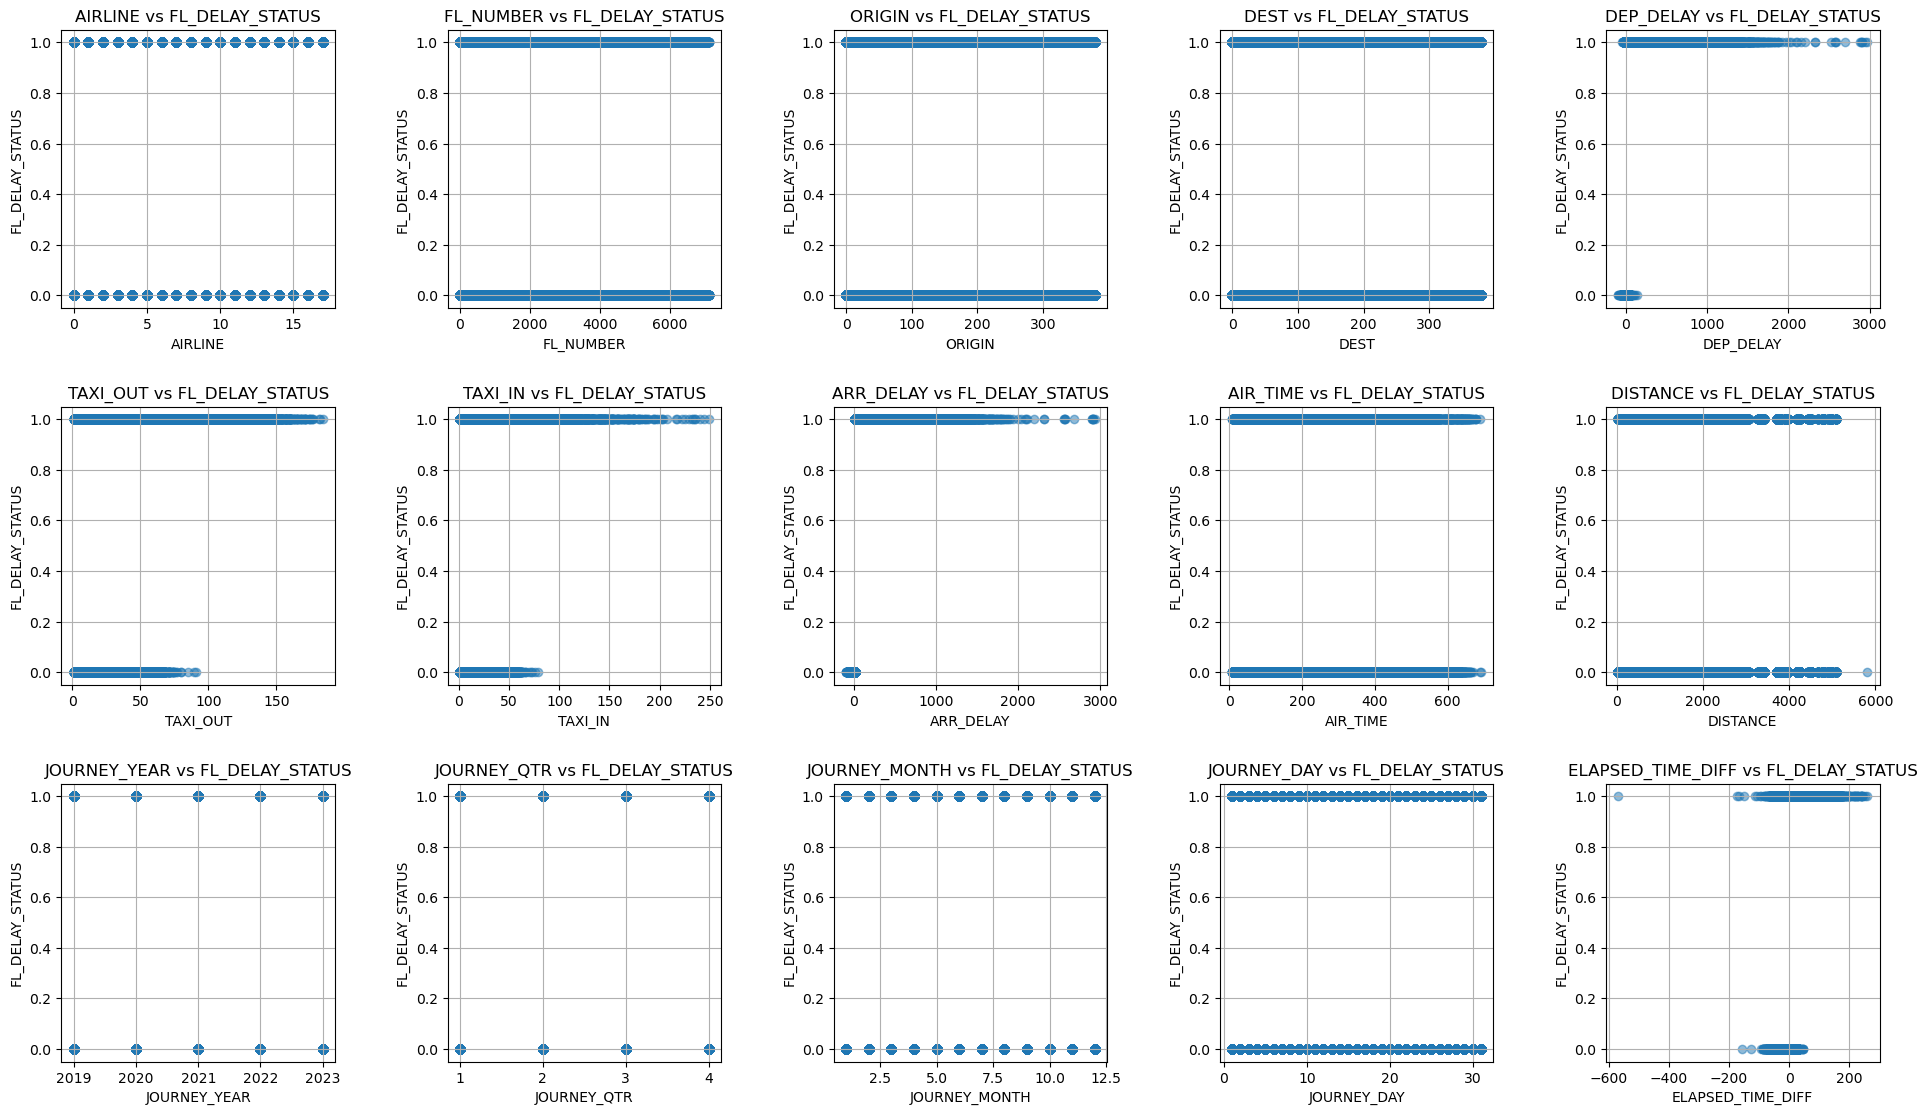

In [63]:
import matplotlib.pyplot as plt

quantitative_columns=X.select_dtypes(include=['float64', 'int64', 'int32']).columns

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
fig.tight_layout(pad=5.0)  
axes = axes.flatten()

for i, column in enumerate(quantitative_columns):
    ax = axes[i]
    ax.scatter(df[column], df['FL_DELAY_STATUS'], alpha=0.5)
    ax.set_title(f'{column} vs FL_DELAY_STATUS')
    ax.set_xlabel(column)
    ax.set_ylabel('FL_DELAY_STATUS')
    ax.grid(True)

plt.show()


## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification.
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.


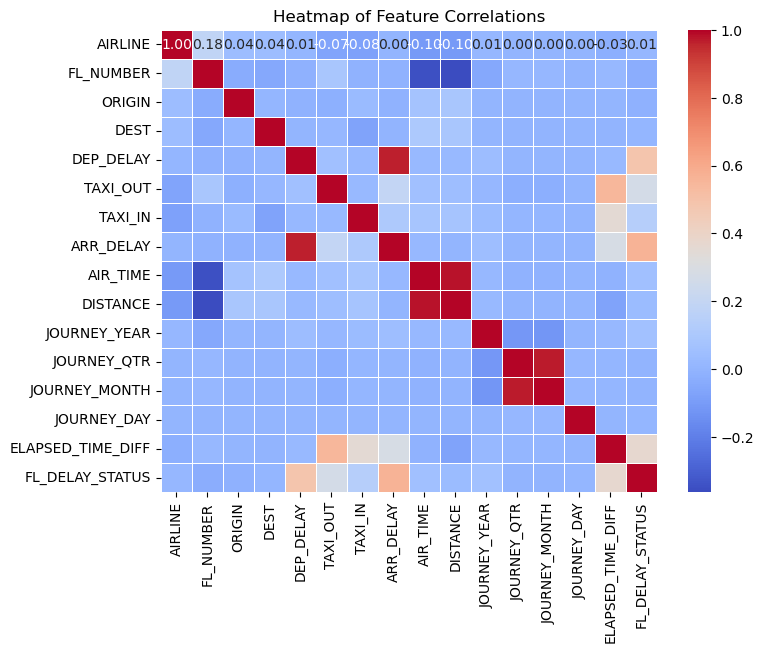

In [64]:
import seaborn as sns

quantitative_features = X.select_dtypes(include=['float64', 'int64','int32']).copy()
quantitative_features['FL_DELAY_STATUS'] = y
correlation_matrix = quantitative_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

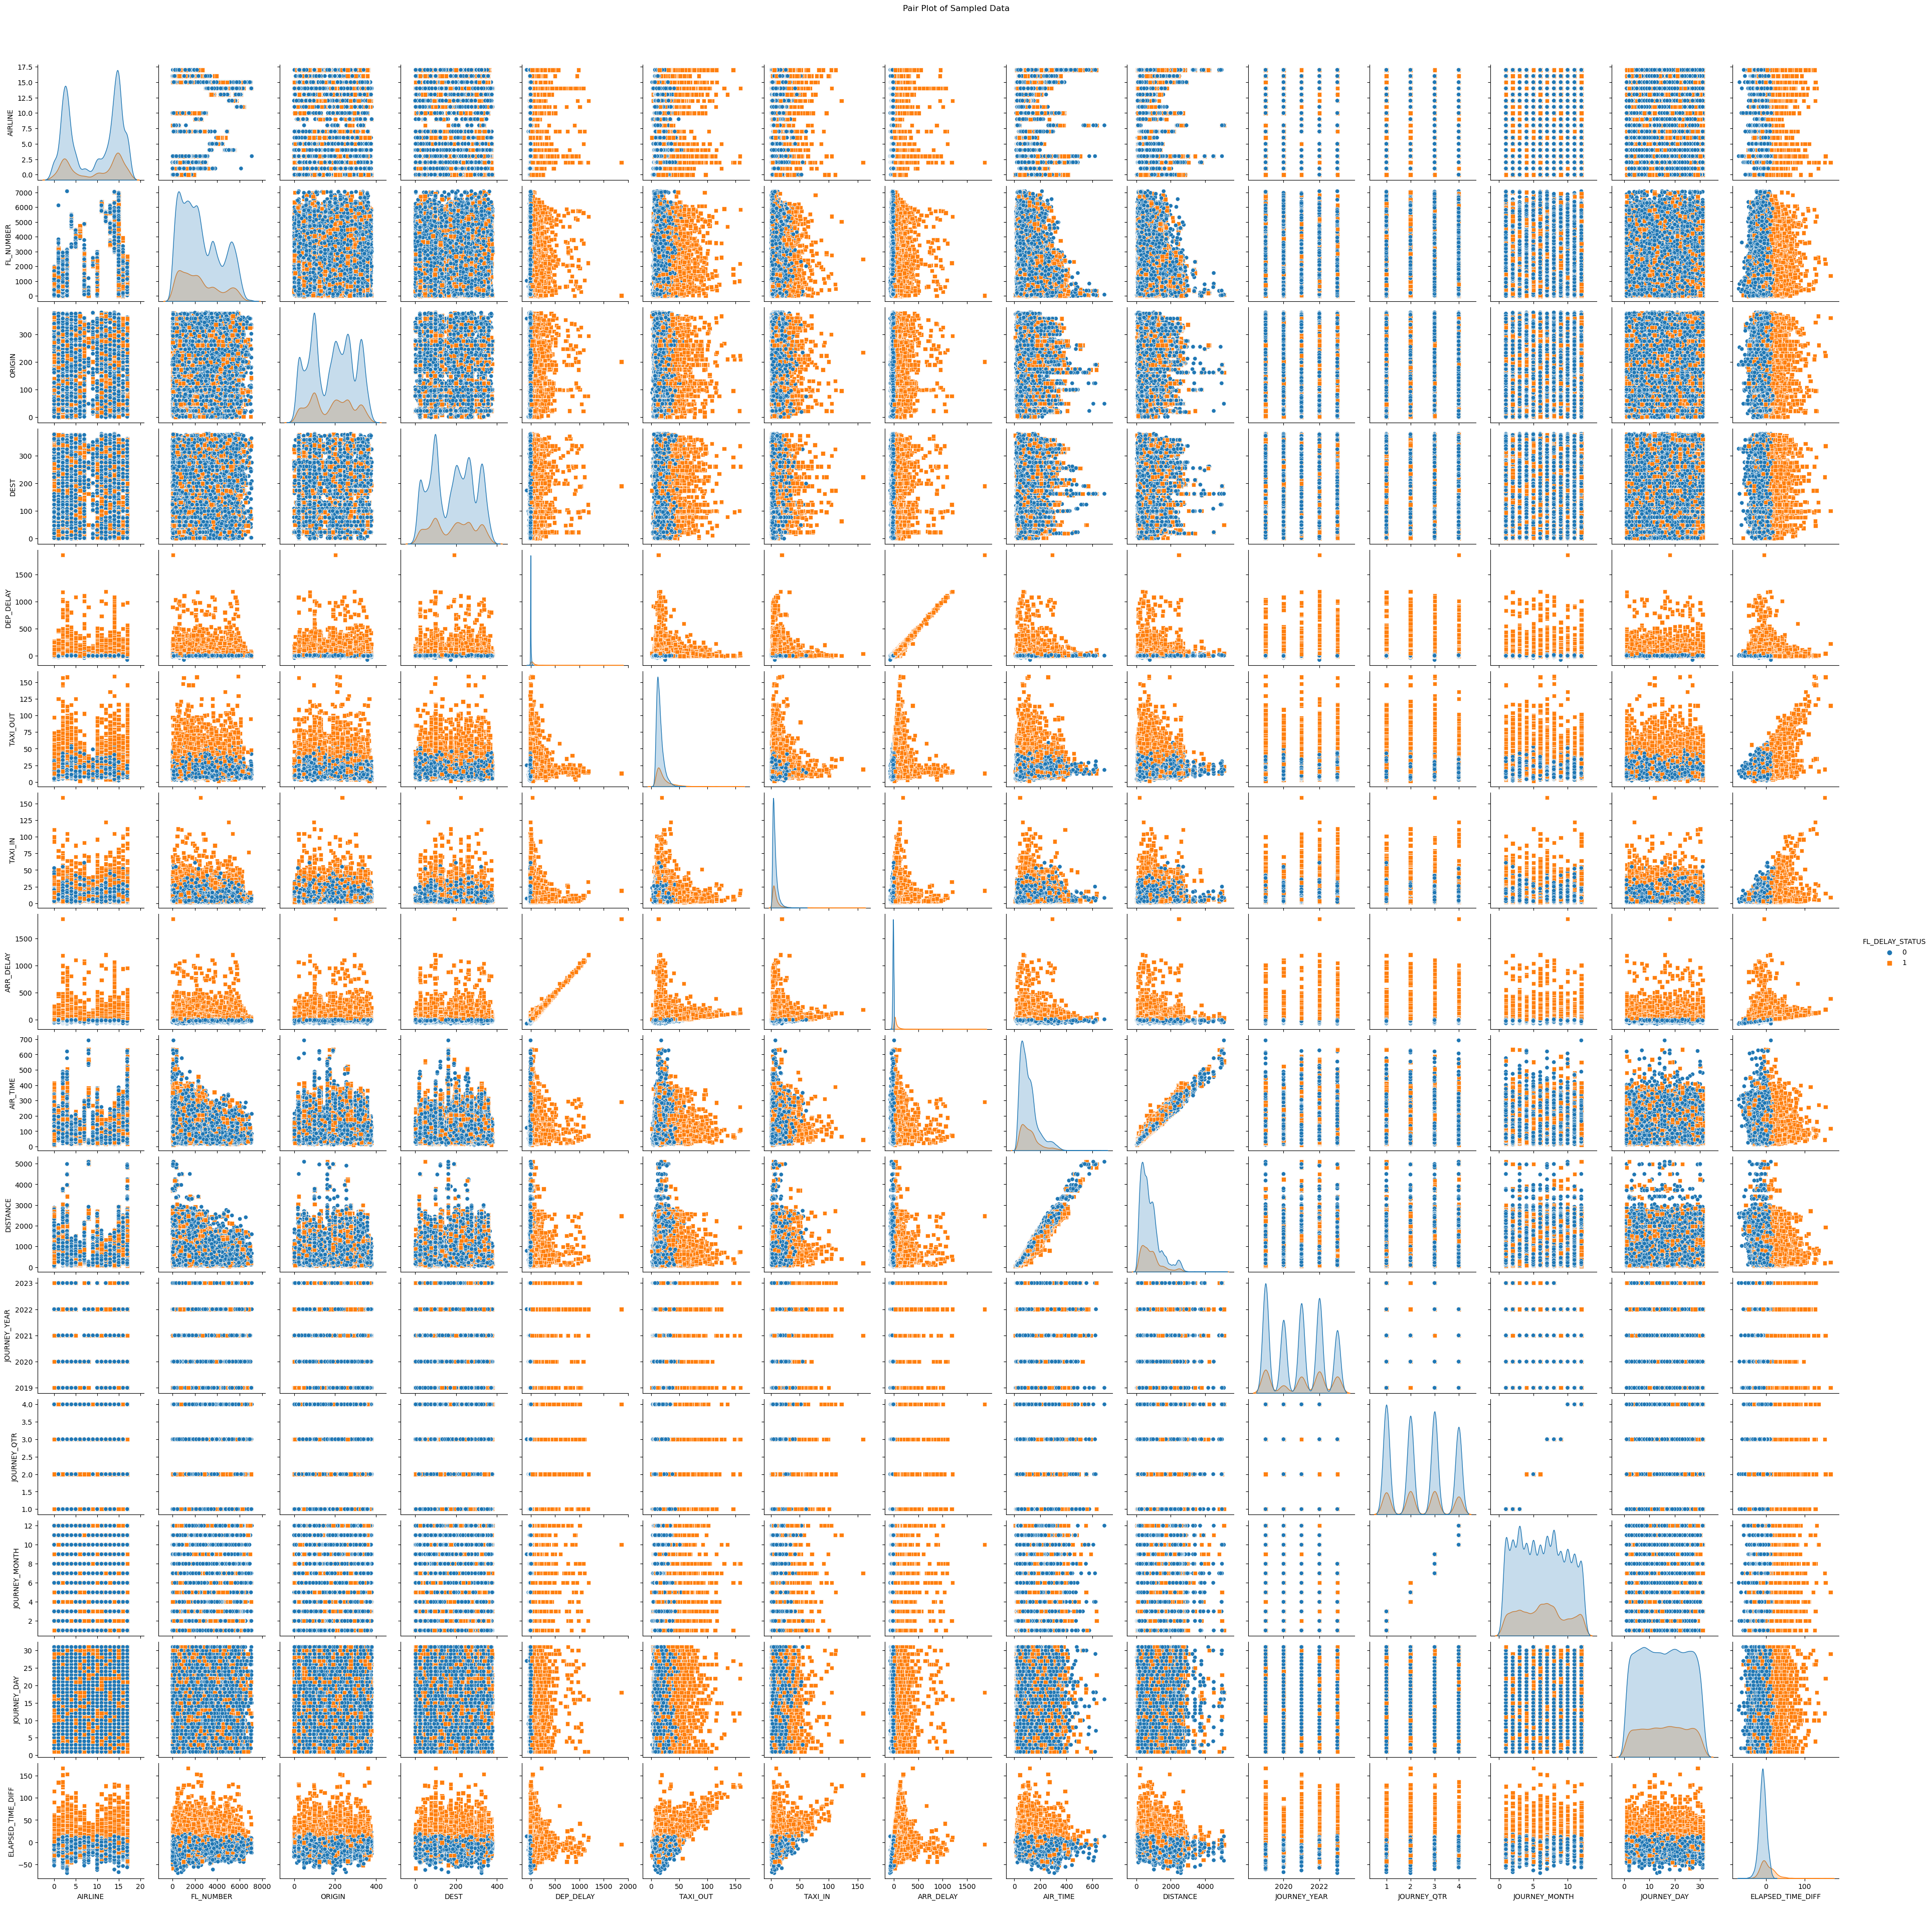

In [42]:
df_subset = df.sample(n=50000, random_state=42)

sns.pairplot(df_subset, hue='FL_DELAY_STATUS', markers=["o", "s"])
plt.suptitle('Pair Plot of Sampled Data', y=1.02)
plt.show()


# 5. Data Wrangling



## 5.1 Univariate Filters

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target/other variable by exploring
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Strenth of Association

(From the above 5 you are required to use only any <b>two</b>)


In [43]:
##---------Type the code below this line------------------##
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X, y, discrete_features='auto')
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series = mutual_info_series.sort_values(ascending=False)

# Top 5 features by Mutual Information
print("Top 5 features by Mutual Information:")
print(mutual_info_series.head(5))


Top 5 features by Mutual Information:
ARR_DELAY            0.520110
DEP_DELAY            0.279015
JOURNEY_YEAR         0.103315
ELAPSED_TIME_DIFF    0.098030
JOURNEY_QTR          0.095811
dtype: float64


In [45]:
from sklearn.preprocessing import KBinsDiscretizer

def gini_impurity(y):
    classes, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()
    return 1 - np.sum(p ** 2)

def gini_for_feature(feature, target):
    feature_values = np.unique(feature)
    gini_total = 0.0
    total_samples = len(target)   
    for value in feature_values:
        target_split = target[feature == value]
        gini_split = gini_impurity(target_split)
        gini_total += (len(target_split) / total_samples) * gini_split
    return gini_total

def gini_for_all_features(df, target_column):
    features = df.columns.drop(target_column)
    target = df[target_column].values   
    gini_scores = {}
    for feature in features:
        if np.issubdtype(df[feature].dtype, np.number):
            binner = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform')
            feature_binned = binner.fit_transform(df[[feature]]).flatten()
        else:
            feature_binned = df[feature].values
        gini_scores[feature] = gini_for_feature(feature_binned, target)
    return pd.Series(gini_scores).sort_values()

gini_scores = gini_for_all_features(df, 'FL_DELAY_STATUS')
top_5_features = gini_scores.head(5)
print("Top 5 features by Gini Index:")
print(top_5_features)


Top 5 features by Gini Index:
TAXI_OUT        0.315154
JOURNEY_YEAR    0.330938
TAXI_IN         0.332416
ARR_DELAY       0.333285
DEP_DELAY       0.333307
dtype: float64


## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.


##---------Type the code below this line------------------##

### Observations:
+ Mutual Information highlights ARR_DELAY as the most influential feature by a large margin, while Gini Index ranks TAXI_OUT as the most significant.
+ ARR_DELAY and DEP_DELAY are consistently ranked as important by both Mutual Information and Gini Index, indicating they have a strong relationship with the target variable.
+ JOURNEY_YEAR also appears in the top 5 in both methods, suggesting that the year of the journey is also relevant to predicting flight delays.

### Choice : GINI INDEX

### Justification: 
- Gini Index is particularly sensitive to class imbalances and reflects the ability of a feature to separate the data into target classes. 
- Mutual Information would likely be the more appropriate method in case of predicting the degree of delay. However, we are focusing on binary classification whether a flight will be delayed or not. 
- So Gini Index could be a valuable method, especially in understanding factors like taxi times (TAXI_OUT and TAXI_IN), which play a role in whether a flight gets delayed.

# 6. Implement Machine Learning Techniques

Use any 2 ML tasks
1. Classification  

2. Clustering  

3. Association Analysis

4. Anomaly detection

You may use algorithms included in the course, e.g. Decision Tree, K-means etc. or an algorithm you learnt on your own with a brief explanation.
A clear justification have to be given for why a certain algorithm was chosen to address your problem.


In [9]:
# Removing columns based on correlation and relationships identified by EDA and data wrangling techniques

least_correlated_attributes = ['AIRLINE', 'FL_NUMBER', 'ORIGIN', 'DEST',
                               'JOURNEY_QTR', 'JOURNEY_MONTH', 'JOURNEY_DAY'] 
df = df.drop(columns=least_correlated_attributes)
X = X.drop(columns=least_correlated_attributes)
print("Final Dataset size after removing least correlated attributes: ",df.shape)

Final Dataset size after removing least correlated attributes:  (2913799, 9)


## 6.1 ML technique 1 + Justification

In [69]:
##---------Type the code below this line------------------##
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

clf = DecisionTreeClassifier(criterion='gini', random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')
best_tree_clf = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


## 6.2 ML technique 2 + Justification

In [11]:
##---------Type the code below this line------------------##
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
knn = KNeighborsClassifier()

param_grid = {
    'knn__n_neighbors': [3, 5], 
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2],  
    'knn__algorithm': ['kd_tree']  
}

pipeline = Pipeline([
    ('scaler', scaler),  
    ('knn', knn)  
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')
best_knn = grid_search.best_estimator_


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'knn__algorithm': 'kd_tree', 'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'distance'}


## 7. Conclusion

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.


-------------------
   DECISION TREE
-------------------
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    459108
           1       1.00      1.00      1.00    123652

    accuracy                           1.00    582760
   macro avg       1.00      1.00      1.00    582760
weighted avg       1.00      1.00      1.00    582760

Confusion Matrix:
[[459108      0]
 [     0 123652]]


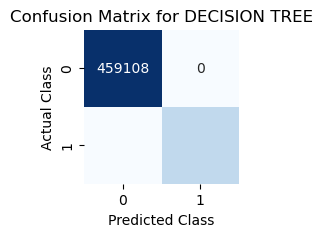

In [70]:
##---------Type the code below this line------------------##
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('-------------------')
print('   DECISION TREE')
print('-------------------')

y_pred = best_tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for DECISION TREE')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

-------------------
K-NEAREST NEIGHBOUR
-------------------
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    459108
           1       0.98      0.96      0.97    123652

    accuracy                           0.99    582760
   macro avg       0.99      0.98      0.98    582760
weighted avg       0.99      0.99      0.99    582760

Confusion Matrix:
[[456848   2260]
 [  4650 119002]]


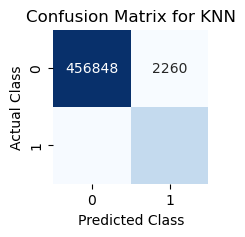

In [14]:
##---------Type the code below this line------------------##
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('-------------------')
print('K-NEAREST NEIGHBOUR')
print('-------------------')

y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for KNN')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.


--------------Type the answers below this line--------------